# Metodo K-Means

In [ ]:
# Montando el drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/CoderHouse/29745-data-science/Clase 18 - Modelos Analíticos para Ciencia de Datos (parte 3) /NoSupervisado/

/content/drive/MyDrive/CoderHouse/29745-data-science/Clase 18 - Modelos Analíticos para Ciencia de Datos (parte 3) /NoSupervisado


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

<h2>Importacion de los datos</h2>

In [ ]:
vinos = pd.read_csv('data_vinos.csv')
vinos.head()

,Vino,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
vinos_variables = vinos.drop(['Vino'], axis = 1)
vinos_variables.describe()
# Podemos ver que tenemos datos que varian muchisimo en sus minimos y sus maximos, por lo que tendremos que normalizarlos

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
vinos_normalizados = (vinos_variables - vinos_variables.min())/(vinos_variables.max() - vinos_variables.min())
vinos_normalizados.describe()
#vinos_normalizados.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Busqueda optima de clusters

In [ ]:
wcss = []            # Es la medida de la suma de las distancias de las observaciones desde sus centroides de grupo.
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, max_iter= 300)
    kmeans.fit(vinos_normalizados)
    wcss.append(kmeans.inertia_)

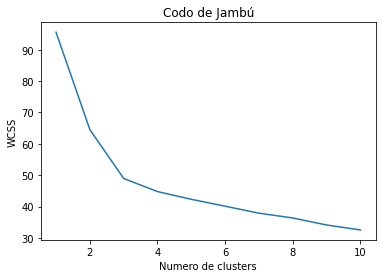

In [ ]:
plt.plot(range(1,11), wcss)
plt.title("Codo de Jambú")
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS');

In [ ]:
modelos_clust = KMeans(n_clusters = 3, max_iter= 300)
modelos_clust.fit_predict(vinos_normalizados)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [ ]:
vinos['KMeans_Clusters'] = modelos_clust.labels_
vinos

,Vino,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,KMeans_Clusters
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,174,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,175,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,176,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,177,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


## Aplicamos PCA para poder graficar

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_vinos = pca.fit_transform(vinos_normalizados)

pca_vinos_df = pd.DataFrame(data = pca_vinos, columns = ['Componente_1', 'Componente_2', 'Componente_3'])

pca_nombres_vinos = pd.concat([pca_vinos_df, vinos[['KMeans_Clusters']]], axis=1)
pca_nombres_vinos

,Componente_1,Componente_2,Componente_3,KMeans_Clusters
0,-0.706336,-0.253193,0.024093,0
1,-0.484977,-0.008823,-0.280482,0
2,-0.521172,-0.189187,0.196217,0
3,-0.821644,-0.580906,0.081110,0
4,-0.202546,-0.059467,0.300240,0
...,...,...,...,...
173,0.739510,-0.471901,0.209360,1
174,0.581781,-0.348366,0.083590,1
175,0.626313,-0.546857,-0.030495,1
176,0.572991,-0.425516,-0.094537,1


In [ ]:
# Normalización: (Xi - Xmin)/(Xmax - Xmin)
# Estandarización: (Xi - u)/std. -> media = 0, desv. std = 1

## Visualizamos los datos para verificacion

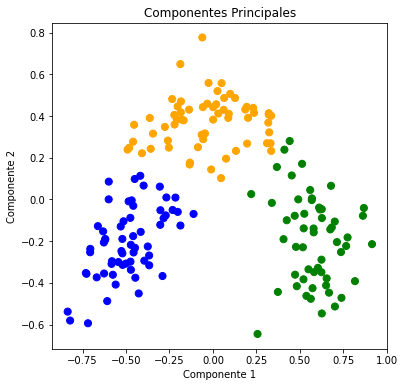

In [ ]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(1,1,1)
ax.set_title('Componentes Principales')
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')

color_theme = np.array(['blue','green','orange'])
#color_theme = np.array(['blue','green','orange','red','yellow'])

ax.scatter(x = pca_nombres_vinos.Componente_1, y = pca_nombres_vinos.Componente_2,
           c=color_theme[pca_nombres_vinos.KMeans_Clusters], s = 50)